<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/8thWeekTask%20(UTS)/UTS_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIbraries**

In [ ]:
pip install mglearn

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import mglearn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# **Load the dataset**

In [ ]:
# Load the dataset
dataset = pd.read_csv(
    'sample_data/AirQualityUCI.csv',
    delimiter=';',
    na_values=['NA', 'missing', ' '],
    decimal=','
)

In [ ]:
# See the data of dataset
print(dataset.head())

         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0

Disini kita dapat mengetahui nama kolom yang dimiliki dari dataset, kita juga dapat mengetahui bahwa ada 2 kolom yang tidak terdefinisi dan juga ada kolom Date dan Time yang tidak berpengaruh pada kualitas model, sehingga pada kasus ini kita akan menghapusnya untuk menjaga kualitas model

# **Data Cleaning**

In [ ]:
# Drop unnecessary columns
dataset = dataset.drop(columns=["Date", "Time", "Unnamed: 15", "Unnamed: 16"], errors='ignore')

In [ ]:
# Data that has missing values
print("\nData that has missing values:")
print(dataset.isnull().sum())


Data that has missing values:
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64


Dari data diatas kita dapat menyimpulkan ada 114 value yang hilang, hal ini dapat mempengaruhi performa model, jadi diperlukan solusi yang mana kita menggunakan KNNImputer

In [ ]:
# Handle missing values using KNNImputer
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
imputer = KNNImputer(n_neighbors=5)
dataset[numeric_columns] = imputer.fit_transform(dataset[numeric_columns])

In [ ]:
# Confirm there are no missing values after imputation
print("\nMissing Values After Imputation:")
print(dataset.isnull().sum())


Missing Values After Imputation:
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


Setelah melakukan pengisian data yang hilang menggunakan KNNImputer dengan cara kerja mengisi nilai yang kosong dengan nilai terdekat, misalnya jika ada kolom CO dengan nilai hilang pada baris tertentu, KNNImputer akan mencari beberapa tetangga terdekat yang memiliki nilai di kolom CO, menghitung rata-rata nilai tersebut, lalu mengisinya di posisi yang hilang., data sudah bersih dari missing values.

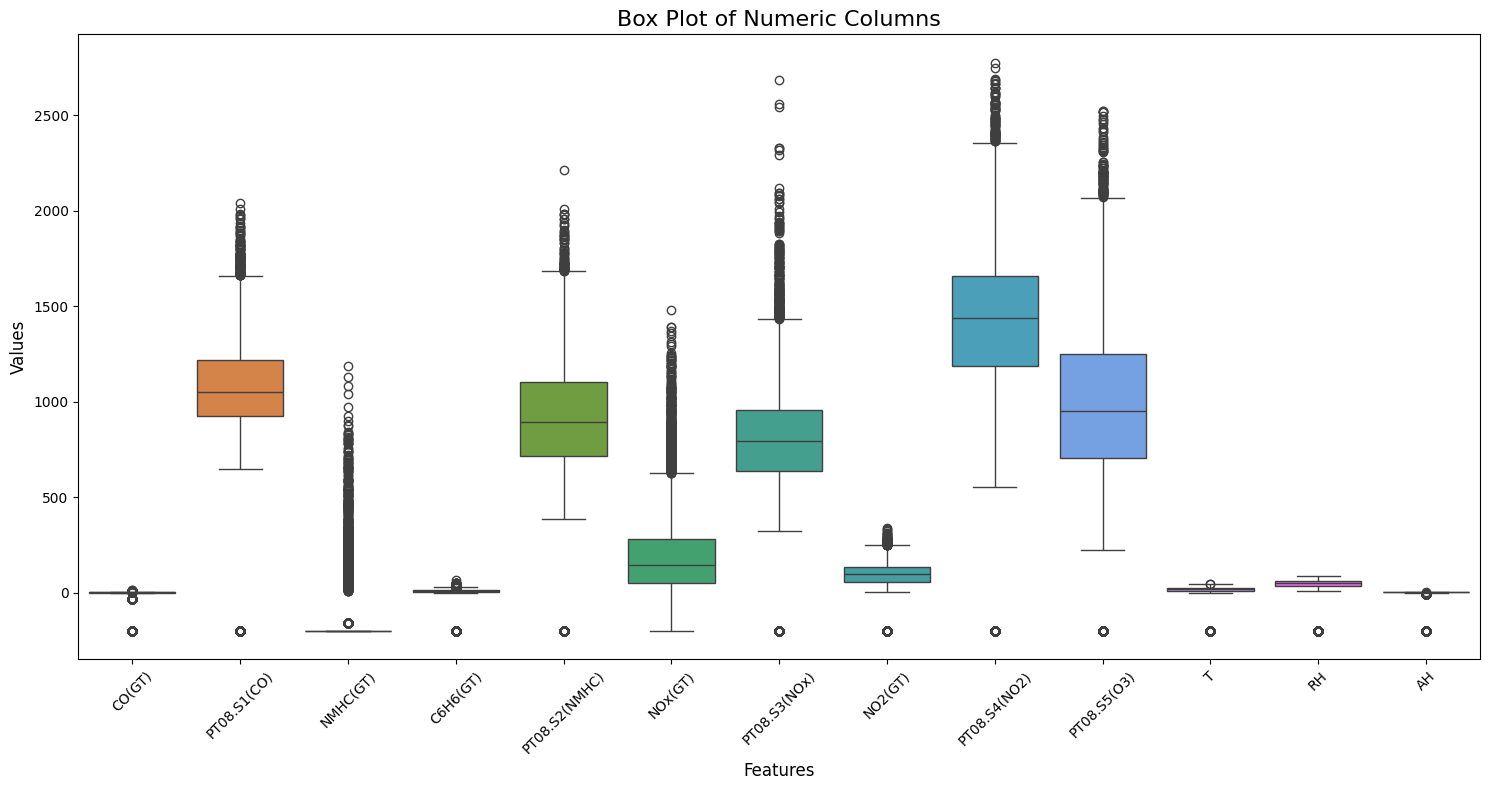

In [ ]:
# Create a box plot for the numeric columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=dataset)

# Add titles and labels
plt.title("Box Plot of Numeric Columns", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Kode ini digunakan untuk membuat box plot yang menampilkan distribusi data dari kolom numerik dalam sebuah dataset. Grafik ini membantu menganalisis penyebaran data, mendeteksi outlier, dan memahami karakteristik data numerik secara visual. Hasilnya adalah grafik dengan label yang rapi dan tata letak yang optimal untuk mempermudah interpretasi.

In [ ]:
# Detect and display outliers for all columns
for column in dataset.columns:
    print(f"Outliers in column: {column}")

    # Calculate IQR
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)]

    # Print outliers
    if not outliers.empty:
        print(outliers)
    else:
        print("No outliers found.")
    print("-" * 50)


Outliers in column: CO(GT)
          CO(GT)  PT08.S1(CO)    NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
10   -200.000000  1011.000000   14.000000   1.300000     527.000000   
25      6.900000  1776.000000  461.000000  27.400000    1488.000000   
26      6.100000  1640.000000  401.000000  24.000000    1404.000000   
34   -200.000000   831.000000   10.000000   1.100000     506.000000   
39   -200.000000  1545.000000 -200.000000  22.100000    1353.000000   
...          ...          ...         ...        ...            ...   
9466  -34.207524  1048.990061 -159.090093   1.865683     894.595276   
9467  -34.207524  1048.990061 -159.090093   1.865683     894.595276   
9468  -34.207524  1048.990061 -159.090093   1.865683     894.595276   
9469  -34.207524  1048.990061 -159.090093   1.865683     894.595276   
9470  -34.207524  1048.990061 -159.090093   1.865683     894.595276   

         NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
10     21.000000   1818.000000   34.000000   11

Data-data yang ditampilkan merupakan data outliers yang akan merusak kualitas model jika tetap digunakan

In [ ]:
# Remove outliers based on IQR
for column in numeric_columns:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataset = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]

In [ ]:
# Show descriptive statistics
description = dataset.describe().transpose()
description_table = tabulate(description, headers="keys", tablefmt="pretty")
print("Descriptive Statistics in Table Format:")
print(description_table)

Descriptive Statistics in Table Format:
+---------------+--------+--------------------+---------------------+--------+--------+--------+----------+--------+
|               | count  |        mean        |         std         |  min   |  25%   |  50%   |   75%    |  max   |
+---------------+--------+--------------------+---------------------+--------+--------+--------+----------+--------+
|    CO(GT)     | 5436.0 | 1.908793230316409  | 1.0656327129257848  |  0.1   |  1.1   |  1.7   |   2.6    |  5.6   |
|  PT08.S1(CO)  | 5436.0 | 1077.9931935246505 | 173.43503153992557  | 667.0  | 944.0  | 1058.5 | 1192.25  | 1633.0 |
|   NMHC(GT)    | 5436.0 |       -200.0       |         0.0         | -200.0 | -200.0 | -200.0 |  -200.0  | -200.0 |
|   C6H6(GT)    | 5436.0 | 9.323859455481973  |  5.689495079943029  |  0.5   |  4.8   |  8.2   |   13.0   |  27.2  |
| PT08.S2(NMHC) | 5436.0 | 922.7389624724062  |  219.0694598957491  | 440.0  | 754.0  | 907.0  |  1083.0  | 1484.0 |
|    NOx(GT)    | 5436.0

Kita juga melakukan mengecekan description pada dataset untuk melihat beberapa indikator nilai seperti count, mean, std, dan sebagainya

# **Data splitting**

In [ ]:
# Split features and target
X = dataset.iloc[:, :-1].values  # All columns except the last as features
y = dataset.iloc[:, -1].values   # The last column as the target

In [ ]:
# Convert continuous target to binary
threshold = y.mean()  # Example threshold: mean value
y_binary = (y > threshold).astype(int)

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

Kode tersebut bertujuan untuk mempersiapkan data sebelum pelatihan model. Awalnya, dataset dibagi menjadi fitur independen (X) dan target (y), di mana X berisi semua kolom kecuali kolom terakhir, sementara y adalah kolom terakhir yang merepresentasikan variabel target. Target yang bersifat kontinu kemudian dikonversi menjadi biner, dengan nilai 1 untuk angka di atas ambang batas tertentu (0 dalam kasus ini) dan 0 untuk angka di bawahnya. Ini memungkinkan model klasifikasi untuk digunakan.

Selanjutnya, dataset dibagi menjadi dua bagian: training set (80%) untuk melatih model dan test set (20%) untuk evaluasi. Proses pembagian dilakukan secara acak tetapi dapat direproduksi menggunakan random_state.

# **Feature Scaling**

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature scaling bertujuan untuk memastikan bahwa semua fitur pada dataset memiliki skala yang seragam. StandardScaler digunakan untuk mengubah data menjadi distribusi dengan rata-rata (mean) 0 dan deviasi standar (standard deviation) 1. Proses ini penting karena beberapa algoritma machine learning, seperti Logistic Regression, bekerja lebih baik ketika fitur-fitur memiliki skala yang konsisten.

# **Logistic Regression Hyperparameter Tuning**

In [ ]:
# Logistic Regression with Hyperparameter Tuning
classifier = LogisticRegression(random_state=42)

In [ ]:
# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

In [ ]:
# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear']})

In [ ]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


Hasil dari GridSearchCV menunjukkan bahwa kombinasi C = 10, penalty = 'l2', dan solver = 'liblinear' menghasilkan model Logistic Regression yang terbaik berdasarkan evaluasi cross-validation yang dilakukan selama proses tuning. Model ini diharapkan dapat memberikan hasil yang lebih baik pada data yang belum terlihat (test set) dan lebih baik menghindari masalah overfitting dibandingkan kombinasi parameter lainnya yang diuji.

In [ ]:
# Evaluate the Logistic Regression Model
train_accuracy = best_model.score(X_train_scaled, y_train)
test_accuracy = best_model.score(X_test_scaled, y_test)

print(f"Logistic Regression Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Logistic Regression Test Accuracy: {test_accuracy * 100:.2f}%")

Logistic Regression Training Accuracy: 93.17%
Logistic Regression Test Accuracy: 94.03%


Model yang telah melalui hyperparameter tuning ini menunjukkan 93.17% accuracy pada data train dan 94.03% untuk data test, yang bisa mengindikasikan bahwa model sangat baik dalam mengenali pola dalam dataset tersebut. Namun, penting untuk memverifikasi bahwa model tidak mengalami overfitting dan benar-benar mampu melakukan generalisasi dengan baik pada data baru yang belum terlihat.

In [ ]:
# Cross-validation with 5 fold
cv_scores = cross_val_score(classifier, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.93103448 0.93908046 0.92413793 0.92289988 0.92750288]
Average Cross-Validation Score: 0.9289311270716769


Secara keseluruhan, hasil cross-validation yang sangat baik menunjukkan bahwa model bekerja dengan baik pada dataset ini dan kemungkinan tidak mengalami overfitting.

In [ ]:
# Predicting the results for the test set
y_pred = best_model.predict(X_test_scaled)

In [ ]:
# Print precision, recall, and F1-score for the test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       555
           1       0.94      0.94      0.94       533

    accuracy                           0.94      1088
   macro avg       0.94      0.94      0.94      1088
weighted avg       0.94      0.94      0.94      1088



Hasil classification report menunjukkan bahwa model Anda sangat akurat, dengan nilai f1-score 0.94 di kedua kelas. Ini adalah indikasi bahwa model yang Anda latih mampu mengklasifikasikan data dengan sangat baik

In [ ]:
# Accuracy score of the test set
test_accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

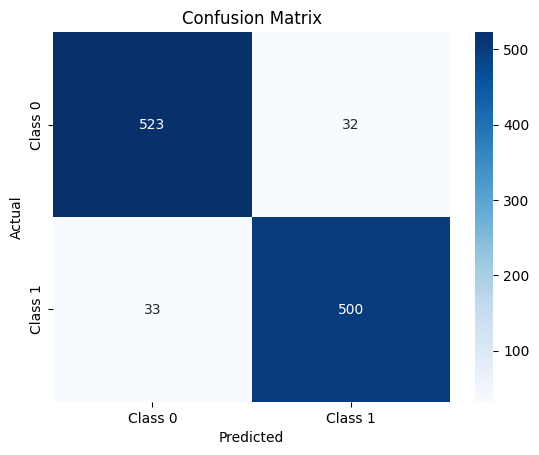

In [ ]:
# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Confusion matrix ini menunjukkan bahwa model memiliki performa yang sangat baik. Dari total prediksi, model berhasil mengklasifikasikan 523 data **Class 0** dan 500 data **Class 1** dengan benar. Namun, terdapat beberapa kesalahan, yaitu 32 data **Class 0** diprediksi sebagai **Class 1** (false positive), dan 33 data **Class 1** diprediksi sebagai **Class 0** (false negative). Model menunjukkan keseimbangan yang baik antara presisi dan recall, menjadikannya efektif dalam mendeteksi kedua kelas.

In [ ]:
# Terapkan PCA untuk mereduksi dimensi ke 2
pca = PCA(n_components=2)
X_train_visualize = pca.fit_transform(X_train_scaled)  # Proyeksikan ke 2 dimensi untuk training set
X_test_visualize = pca.fit_transform(X_test_scaled)       # Proyeksikan ke 2 dimensi untuk test set


In [ ]:
# Re-train model dengan data PCA untuk visualisasi
best_model.fit(X_train_visualize, y_train)

LogisticRegression(C=100, random_state=42, solver='liblinear')

In [ ]:
# Buat grid untuk visualisasi
x_min, x_max = X_train_visualize[:, 0].min() - 1, X_train_visualize[:, 0].max() + 1
y_min, y_max = X_train_visualize[:, 1].min() - 1, X_train_visualize[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [ ]:
# Plotting decision boundary
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

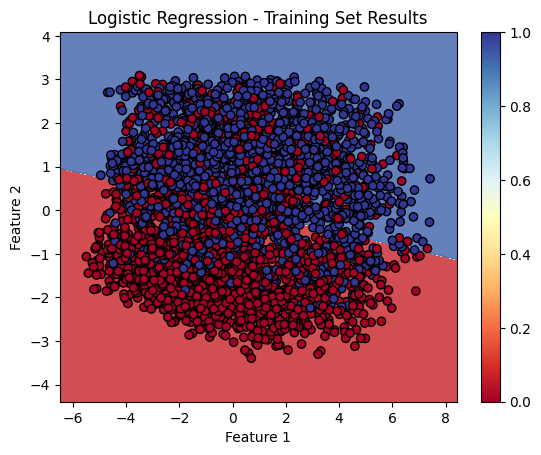

In [ ]:
# Plot the decision boundary and training data points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_visualize[:, 0], X_train_visualize[:, 1], c=y_train, marker='o', edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title('Logistic Regression - Training Set Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

Visualisasi ini menggambarkan hasil klasifikasi Logistic Regression pada data training, menggunakan dua fitur yang ditampilkan pada sumbu horizontal dan vertikal. Latar belakang berwarna menunjukkan wilayah prediksi model, dengan warna merah merepresentasikan prediksi untuk kelas 0 dan warna biru untuk kelas 1. Gradien pada warna tersebut mengindikasikan probabilitas prediksi, di mana warna yang lebih gelap menunjukkan tingkat keyakinan yang lebih tinggi dari model.

Data titik-titik di plot mewakili sampel dalam data training, dengan titik merah sebagai data dari kelas 0 dan titik biru dari kelas 1. Garis pemisah yang terlihat di antara area merah dan biru adalah batas keputusan yang ditentukan oleh Logistic Regression, di mana model membagi ruang fitur menjadi dua wilayah klasifikasi. Secara keseluruhan, model tampak mampu memisahkan kedua kelas dengan cukup baik, meskipun beberapa data terlihat berada di wilayah yang salah klasifikasi, yang menunjukkan adanya keterbatasan dalam menangkap distribusi data sepenuhnya.

In [ ]:
# Visualize decision boundaries for the test set
Z_test = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

<ipython-input-368-6add86c47ce7>:3: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_visualize[:, 0], X_test_visualize[:, 1], c=y_test, marker='x', edgecolor='k', cmap=plt.cm.RdYlBu)


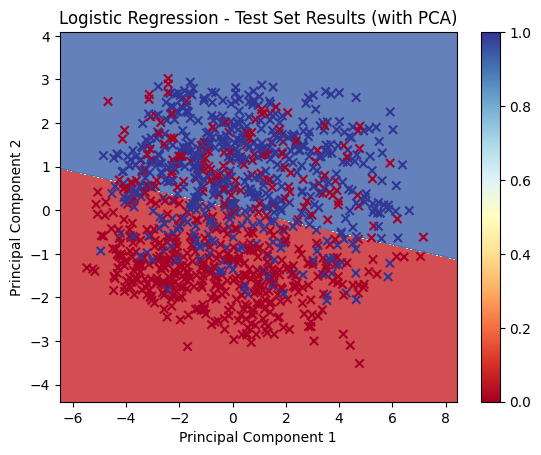

In [ ]:
# Plot decision boundary and test set
plt.contourf(xx, yy, Z_test, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_visualize[:, 0], X_test_visualize[:, 1], c=y_test, marker='x', edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title('Logistic Regression - Test Set Results (with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

Visualisasi ini menunjukkan hasil klasifikasi Logistic Regression pada data test setelah penerapan Principal Component Analysis (PCA). Grafiknya menggunakan dua komponen utama yang dihasilkan PCA sebagai sumbu utama. Warna latar menunjukkan wilayah prediksi model, dengan warna merah menunjukkan prediksi untuk kelas 0 dan biru untuk kelas 1. Gradasi warna menggambarkan probabilitas prediksi, di mana warna yang lebih pekat menandakan keyakinan model yang lebih tinggi.

Setiap titik dalam plot mewakili sampel dari data uji, dengan tanda silang merah untuk kelas 0 dan tanda silang biru untuk kelas 1. Garis batas antara area merah dan biru menandakan decision boundary yang dibentuk oleh model setelah PCA. Dibandingkan dengan data training, distribusi titik-titik dalam data uji terlihat lebih menyebar, yang mungkin menyebabkan lebih banyak data berada di wilayah klasifikasi yang salah. Hal ini menunjukkan bahwa model mungkin tidak sepenuhnya generalisasi untuk data uji, meskipun masih mempertahankan pemisahan antara kedua kelas.

 **Exploratory Data Analysis (EDA) Logistic Regression**

Dengan dataset AirQualityUCI.csv ini kita melakukan prediksi dengan model Logistic Regression. Sebelum digunakannya model tersebut, kita melakukan data cleaning, data splitting, dan feature scaling agar model yang nantinya tercipta akan maksimal.

Pada Logistic Regression kita melakukan Hyperparameter Tuning untuk menemukan kombinasi nilai terbaik dari hyperparameter dalam model machine learning yang dapat menghasilkan performa terbaik. Kita mendapatkan parameter terbaiknya yaitu  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} yang mana penjelasannya sebagai berikut:

- Dalam hal ini, nilai **C = 10** menunjukkan bahwa model menemukan trade-off terbaik antara kompleksitas model dan kemampuan untuk menggeneralisasi ke data baru.
- Dengan menggunakan **'l2'**, model memberikan penalti lebih pada parameter yang memiliki nilai besar, sehingga membantu model untuk lebih sederhana dan mencegah overfitting.
-**'liblinear'** adalah salah satu solver yang paling sering digunakan untuk masalah yang lebih kecil dan dataset yang tidak terlalu besar.



Lalu kita mendapatkan nilai 93.17% untuk training accuracy dan 94.03% test accuracy, karena persentase cukup tinggi maka dilakukan pengecekan atau validasi memastikan model tidak overfitting. Validasi dilakukan dengan menggunakan cross-validation yang menghasilkan nilai sebagai berikut:


```
Cross-Validation Scores: [0.93103448 0.93908046 0.92413793 0.92289988 0.92750288]
Average Cross-Validation Score: 0.9289311270716769
```

Secara keseluruhan, hasil cross-validation yang sangat baik menunjukkan bahwa model bekerja dengan baik pada dataset ini dan kemungkinan tidak mengalami overfitting.

Lalu dilakukan lagi validasi menggunakan classification report yang menghasilkan nilai sebagai berikut:


```
                  precision    recall  f1-score  support

           0       0.94      0.94      0.94       555
           1       0.94      0.94      0.94       533

    accuracy                           0.94      1088
   macro avg       0.94      0.94      0.94      1088
weighted avg       0.94      0.94      0.94      1088

```
Hasil classification report menunjukkan bahwa model sangat baik, dengan nilai f1-score 0.94 (mendekati 1). Ini adalah indikasi bahwa model yang dilatih mampu mengklasifikasikan data dengan sangat baik.

Lalu kita mendapatkan nilai dari Confusion Matrik sebagai berikut:


```
[523  32]
[ 33 500]
```
Confusion matrix ini menunjukkan bahwa model memiliki performa yang sangat baik. Dari total prediksi, model berhasil mengklasifikasikan 523 data Class 0 dan 500 data Class 1 dengan benar. Namun, terdapat beberapa kesalahan, yaitu 32 data Class 0 diprediksi sebagai Class 1 (false positive), dan 33 data Class 1 diprediksi sebagai Class 0 (false negative). Hasil ini sejalan dengan hasil classification report yang menunjukkan nilai precision, recall, dan f1-score.


Dan yang terakhir kita melakukan visualisasi untuk melihat pembagian daerah menggunakan logistic regression yang dibantu dengan Principal Component Analysis (PCA). PCA berguna untuk reduksi dimensi, menghilangkan redundansi antar fitur, dan menyederhanakan data sambil tetap mempertahankan informasi penting. Hal ini memungkinkan model machine learning untuk bekerja lebih efisien, lebih cepat, dan lebih baik dalam menghindari overfitting. Untuk Training Set Result dan Test Set Result keduanya membagi daerah dengan baik, walaupun ada beberapa data yang berada di luar daerahnya, namun secara keseluruhan model dengan Logistic Regression ini berjalan dengan sangat baik



# **KNN Hyperparameter Tuning**

In [ ]:
# KNN Classifier with Hyperparameter Tuning
knn_classifier = KNeighborsClassifier()

In [ ]:
# Define hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
# Hyperparameter tuning using GridSearchCV
knn_grid_search = GridSearchCV(estimator=knn_classifier, param_grid=knn_param_grid, cv=5)
knn_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [ ]:
# Get the best parameters and the best model
knn_best_params = knn_grid_search.best_params_
knn_best_model = knn_grid_search.best_estimator_

In [ ]:
print(f"Best Parameters: {best_params}")

Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


Hasil dari GridSearchCV menunjukkan bahwa kombinasi C = 100, penalty = 'l2', dan solver = 'liblinear' menghasilkan model KNN yang terbaik berdasarkan evaluasi cross-validation yang dilakukan selama proses tuning. Model ini diharapkan dapat memberikan hasil yang lebih baik pada data yang belum terlihat (test set) dan lebih baik menghindari masalah overfitting dibandingkan kombinasi parameter lainnya yang diuji.

In [ ]:
# Train the KNN model with best parameters
knn_classifier = knn_grid_search.best_estimator_

In [ ]:
# Evaluate the KNN model
knn_train_accuracy = knn_classifier.score(X_train_scaled, y_train)
knn_test_accuracy = knn_classifier.score(X_test_scaled, y_test)

print(f"KNN Training Accuracy (Tuned Model): {knn_train_accuracy * 100:.2f}%")
print(f"KNN Test Accuracy (Tuned Model): {knn_test_accuracy * 100:.2f}%")

KNN Training Accuracy (Tuned Model): 100.00%
KNN Test Accuracy (Tuned Model): 92.28%


Model yang telah melalui hyperparameter tuning ini menunjukkan 100% accuracy pada data train dan 92.28% untuk data test, yang bisa mengindikasikan bahwa model sangat baik dalam mengenali pola dalam dataset tersebut. Namun, penting untuk memverifikasi bahwa model tidak mengalami overfitting dan benar-benar mampu melakukan generalisasi dengan baik pada data baru yang belum terlihat.

In [ ]:
# Cross-validation with 5 fold
knn_cv_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5)
print(f"KNN Cross-Validation Scores: {knn_cv_scores}")
print(f"KNN Average Cross-Validation Score: {knn_cv_scores.mean()}")

KNN Cross-Validation Scores: [0.9183908  0.92183908 0.92413793 0.93210587 0.92750288]
KNN Average Cross-Validation Score: 0.9247953123553299


Secara keseluruhan, hasil cross-validation yang sangat baik menunjukkan bahwa model Anda bekerja dengan baik pada dataset ini dan kemungkinan tidak mengalami overfitting.

In [ ]:
# Predicting the results for the test set
knn_y_pred = knn_classifier.predict(X_test_scaled)

In [ ]:
# Print precision, recall, and F1-score for the test set
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       555
           1       0.92      0.92      0.92       533

    accuracy                           0.92      1088
   macro avg       0.92      0.92      0.92      1088
weighted avg       0.92      0.92      0.92      1088



Hasil classification report menunjukkan bahwa model akurat, dengan nilai f1-score 0.92 di kedua kelas. Ini adalah indikasi bahwa model yang Anda latih mampu mengklasifikasikan data dengan sangat baik

In [ ]:
# Confusion Matrix for KNN
knn_cm = confusion_matrix(y_test, knn_y_pred)

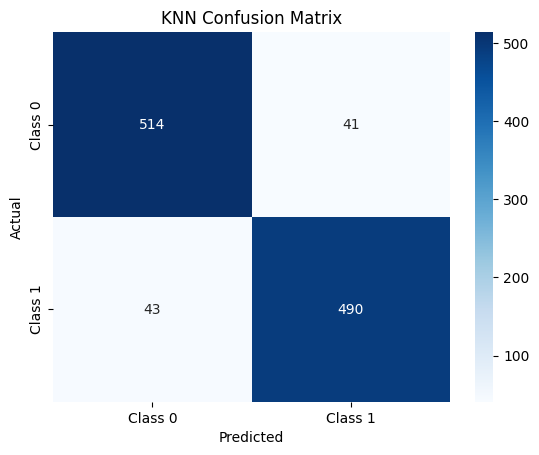

In [ ]:
# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Confusion matrix ini menunjukkan bahwa model memiliki performa yang sangat baik. Dari total prediksi, model berhasil mengklasifikasikan 514 data Class 0 dan 490 data Class 1 dengan benar. Namun, terdapat beberapa kesalahan, yaitu 41 data Class 0 diprediksi sebagai Class 1 (false positive), dan 43 data Class 1 diprediksi sebagai Class 0 (false negative). Model menunjukkan keseimbangan yang baik antara presisi dan recall, menjadikannya efektif dalam mendeteksi kedua kelas.

In [ ]:
# PCA untuk KNN Visualisasi
knn_pca = PCA(n_components=2)
X_train_knn_visualize = knn_pca.fit_transform(X_train_scaled)  # Proyeksikan ke 2 dimensi untuk training set
X_test_knn_visualize = knn_pca.transform(X_test_scaled)       # Proyeksikan ke 2 dimensi untuk test set

In [ ]:
# Re-train KNN model dengan data PCA untuk visualisasi
knn_best_model.fit(X_train_knn_visualize, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [ ]:
# Buat grid untuk visualisasi
x_min_knn, x_max_knn = X_train_knn_visualize[:, 0].min() - 1, X_train_knn_visualize[:, 0].max() + 1
y_min_knn, y_max_knn = X_train_knn_visualize[:, 1].min() - 1, X_train_knn_visualize[:, 1].max() + 1
xx_knn, yy_knn = np.meshgrid(np.arange(x_min_knn, x_max_knn, 0.01), np.arange(y_min_knn, y_max_knn, 0.01))

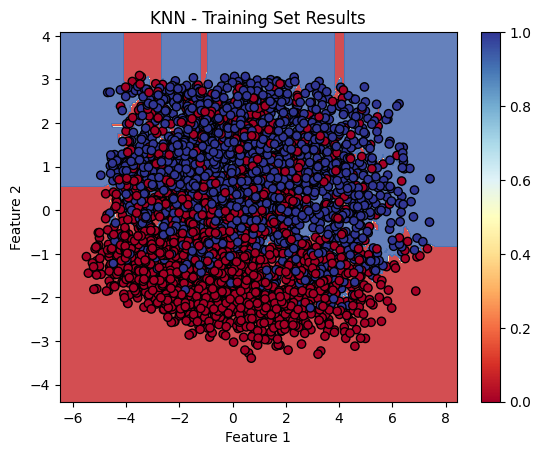

In [ ]:
# Plotting decision boundary for KNN
Z_knn = knn_best_model.predict(np.c_[xx_knn.ravel(), yy_knn.ravel()])
Z_knn = Z_knn.reshape(xx_knn.shape)

plt.contourf(xx_knn, yy_knn, Z_knn, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_knn_visualize[:, 0], X_train_knn_visualize[:, 1], c=y_train, marker='o', edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title('KNN - Training Set Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

Visualisasi ini menggambarkan hasil klasifikasi KNN pada data training, menggunakan dua fitur yang ditampilkan pada sumbu horizontal dan vertikal. Latar belakang berwarna menunjukkan wilayah prediksi model, dengan warna merah merepresentasikan prediksi untuk kelas 0 dan warna biru untuk kelas 1. Gradien pada warna tersebut mengindikasikan probabilitas prediksi, di mana warna yang lebih gelap menunjukkan tingkat keyakinan yang lebih tinggi dari model.

Data titik-titik di plot mewakili sampel dalam data training, dengan titik merah sebagai data dari kelas 0 dan titik biru dari kelas 1. Garis pemisah yang terlihat di antara area merah dan biru adalah batas keputusan yang ditentukan oleh KNN, di mana model membagi ruang fitur menjadi dua wilayah klasifikasi. Secara keseluruhan, model tampak mampu memisahkan kedua kelas dengan cukup baik, meskipun beberapa data terlihat berada di wilayah yang salah klasifikasi, yang menunjukkan adanya keterbatasan dalam menangkap distribusi data sepenuhnya.

<ipython-input-385-ff818db05ab2>:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_knn_visualize[:, 0], X_test_knn_visualize[:, 1], c=y_test, marker='x', edgecolor='k', cmap=plt.cm.RdYlBu)


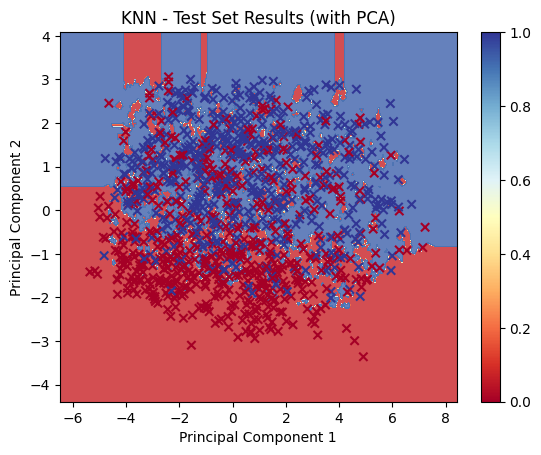

In [ ]:
# Visualize decision boundaries for the test set
Z_knn_test = knn_best_model.predict(np.c_[xx_knn.ravel(), yy_knn.ravel()])
Z_knn_test = Z_knn_test.reshape(xx_knn.shape)

plt.contourf(xx_knn, yy_knn, Z_knn_test, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_knn_visualize[:, 0], X_test_knn_visualize[:, 1], c=y_test, marker='x', edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title('KNN - Test Set Results (with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

Visualisasi ini menunjukkan hasil klasifikasi KNN pada data test setelah penerapan Principal Component Analysis (PCA). Grafiknya menggunakan dua komponen utama yang dihasilkan PCA sebagai sumbu utama. Warna latar menunjukkan wilayah prediksi model, dengan warna merah menunjukkan prediksi untuk kelas 0 dan biru untuk kelas 1. Gradasi warna menggambarkan probabilitas prediksi, di mana warna yang lebih pekat menandakan keyakinan model yang lebih tinggi.

Setiap titik dalam plot mewakili sampel dari data uji, dengan tanda silang merah untuk kelas 0 dan tanda silang biru untuk kelas 1. Garis batas antara area merah dan biru menandakan decision boundary yang dibentuk oleh model setelah PCA. Dibandingkan dengan data training, distribusi titik-titik dalam data uji terlihat lebih menyebar, yang mungkin menyebabkan lebih banyak data berada di wilayah klasifikasi yang salah. Hal ini menunjukkan bahwa model mungkin tidak sepenuhnya generalisasi untuk data uji, meskipun masih mempertahankan pemisahan antara kedua kelas.

 **Exploratory Data Analysis (EDA) KNN**

Pada KNN kita melakukan Hyperparameter Tuning untuk menemukan kombinasi nilai terbaik dari hyperparameter dalam model machine learning yang dapat menghasilkan performa terbaik. Kita mendapatkan parameter terbaiknya yaitu  {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'} yang mana penjelasannya sebagai berikut:

- Dalam hal ini, nilai **C = 100** menunjukkan bahwa model menemukan trade-off terbaik antara kompleksitas model dan kemampuan untuk menggeneralisasi ke data baru.
- Dengan menggunakan **'l2'**, model memberikan penalti lebih pada parameter yang memiliki nilai besar, sehingga membantu model untuk lebih sederhana dan mencegah overfitting.
-**'liblinear'** adalah salah satu solver yang paling sering digunakan untuk masalah yang lebih kecil dan dataset yang tidak terlalu besar.



Lalu kita mendapatkan nilai 100% untuk training accuracy dan 92.28% test accuracy, karena persentase cukup tinggi maka dilakukan pengecekan atau validasi memastikan model tidak overfitting. Validasi dilakukan dengan menggunakan cross-validation yang menghasilkan nilai sebagai berikut:


```
KNN Cross-Validation Scores: [0.9183908  0.92183908 0.92413793 0.93210587 0.92750288]
KNN Average Cross-Validation Score: 0.9247953123553299
```

Secara keseluruhan, hasil cross-validation yang sangat baik menunjukkan bahwa model bekerja dengan baik pada dataset ini dan kemungkinan tidak mengalami overfitting.

Lalu dilakukan lagi validasi menggunakan classification report yang menghasilkan nilai sebagai berikut:


```
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       555
           1       0.92      0.92      0.92       533

    accuracy                           0.92      1088
   macro avg       0.92      0.92      0.92      1088
weighted avg       0.92      0.92      0.92      1088

```
Hasil classification report menunjukkan bahwa model sangat baik, dengan nilai f1-score 0.92 (mendekati 1). Ini adalah indikasi bahwa model yang dilatih mampu mengklasifikasikan data dengan sangat baik.

Lalu kita mendapatkan nilai dari Confusion Matrik sebagai berikut:


```
[514  41]
[ 43 490]
```
Confusion matrix ini menunjukkan bahwa model memiliki performa yang baik. Dari total prediksi, model berhasil mengklasifikasikan 514 data Class 0 dan 490 data Class 1 dengan benar. Namun, terdapat beberapa kesalahan, yaitu 41 data Class 0 diprediksi sebagai Class 1 (false positive), dan 43 data Class 1 diprediksi sebagai Class 0 (false negative). Hasil ini sejalan dengan hasil classification report yang menunjukkan nilai precision, recall, dan f1-score.


Dan yang terakhir kita melakukan visualisasi untuk melihat pembagian daerah menggunakan KNN yang dibantu dengan Principal Component Analysis (PCA). PCA berguna untuk reduksi dimensi, menghilangkan redundansi antar fitur, dan menyederhanakan data sambil tetap mempertahankan informasi penting. Hal ini memungkinkan model machine learning untuk bekerja lebih efisien, lebih cepat, dan lebih baik dalam menghindari overfitting. Untuk Training Set Result dan Test Set Result keduanya membagi daerah dengan baik, walaupun ada beberapa data yang berada di luar daerahnya, namun secara keseluruhan model dengan KNN ini berjalan dengan cukup baik



# **Decision Tree Hyperparamater Tuning**

In [ ]:
# Create the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [ ]:
# Define the hyperparameter grid for tuning
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
# Get the best parameters and the best model
dt_best_params = dt_grid_search.best_params_
dt_best_model = dt_grid_search.best_estimator_

print(f"Best Parameters for Decision Tree: {dt_best_params}")

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}


Pertama, nilai criterion yang dipilih adalah 'entropy'. Ini berarti bahwa model menggunakan konsep entropi untuk mengevaluasi kualitas suatu pembagian (split) dalam pohon keputusan. Pendekatan ini fokus pada pengurangan ketidakpastian atau keragaman dalam data setiap kali sebuah split dilakukan.

Selanjutnya, max_depth bernilai None, yang mengindikasikan bahwa tidak ada batasan kedalaman pada pohon keputusan. Artinya, pohon akan terus tumbuh hingga semua daun hanya berisi satu kelas atau hingga tidak ada lagi split yang dapat meningkatkan hasil.

Kemudian, min_samples_leaf ditetapkan pada nilai 1. Ini menentukan jumlah minimal sampel yang harus ada pada setiap daun pohon, dan dalam kasus ini, daun dapat dibentuk bahkan dengan satu sampel saja. Hal ini memungkinkan pohon menangkap detail dari data secara granular.

Parameter min_samples_split memiliki nilai 5, menunjukkan bahwa suatu node harus memiliki setidaknya 5 sampel untuk dapat dipecah lebih lanjut. Batasan ini membantu mencegah model menjadi terlalu kompleks atau overfit dengan membatasi pembagian pada node dengan sedikit data.

Terakhir, parameter splitter bernilai 'best'. Ini berarti bahwa model memilih pembagian yang memberikan hasil terbaik berdasarkan kriteria yang dipilih (dalam hal ini, entropy), memastikan bahwa setiap pembagian meningkatkan kualitas pohon secara optimal.

Dengan parameter-parameter ini, model Decision Tree dioptimalkan untuk keseimbangan antara kompleksitas dan performa dalam memprediksi data. Kombinasi tersebut memungkinkan model bekerja secara efektif dengan dataset yang digunakan selama pelatihan.

In [ ]:
# Train the model with the best parameters
dt_classifier = dt_grid_search.best_estimator_

In [ ]:
# Evaluate the model
dt_train_accuracy = dt_classifier.score(X_train_scaled, y_train)
dt_test_accuracy = dt_classifier.score(X_test_scaled, y_test)

print(f"Training Accuracy (Tuned Decision Tree): {dt_train_accuracy * 100:.2f}%")
print(f"Test Accuracy (Tuned Decision Tree): {dt_test_accuracy * 100:.2f}%")

Training Accuracy (Tuned Decision Tree): 99.77%
Test Accuracy (Tuned Decision Tree): 96.23%


Pada data pelatihan, model mencapai akurasi sebesar 99.77%, yang berarti model hampir sempurna dalam mempelajari pola dari data pelatihan. Hal ini menunjukkan bahwa model mampu menangkap hampir seluruh hubungan atau karakteristik yang ada pada data tersebut. Tingkat akurasi yang sangat tinggi seperti ini sering kali menandakan bahwa model benar-benar sesuai dengan data pelatihan yang digunakan.

Namun, yang lebih penting adalah bagaimana model berkinerja pada data pengujian, karena ini mencerminkan kemampuannya untuk melakukan generalisasi terhadap data yang belum pernah dilihat sebelumnya. Pada data pengujian, model mencapai akurasi sebesar 96.23%, yang juga merupakan hasil yang sangat baik. Hal ini menunjukkan bahwa model tidak hanya belajar dari data pelatihan tetapi juga dapat memprediksi dengan akurasi tinggi pada data baru.

In [ ]:
# Cross-validation with 5 folds
dt_cv_scores = cross_val_score(dt_classifier, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Scores for Decision Tree: {dt_cv_scores}")
print(f"Average Cross-Validation Score for Decision Tree: {dt_cv_scores.mean()}")

Cross-Validation Scores for Decision Tree: [0.96781609 0.97241379 0.97126437 0.95972382 0.96432681]
Average Cross-Validation Score for Decision Tree: 0.9671089771569911


Hasil dari kode yang dijalankan menunjukkan evaluasi performa model Decision Tree menggunakan metode cross-validation dengan 5 folds. Metode ini membagi data pelatihan menjadi lima bagian, di mana empat bagian digunakan untuk melatih model dan satu bagian untuk menguji, dan proses ini dilakukan secara bergantian hingga setiap bagian digunakan sebagai data pengujian sekali.

Pada setiap iterasi, model menghasilkan skor akurasi pada data pengujian dari masing-masing fold. Skor-skor tersebut adalah sebagai berikut: 96.78%, 97.24%, 97.13%, 95.97%, dan 96.43%. Ini menunjukkan bahwa model memiliki performa yang stabil dan konsisten di setiap fold, dengan variasi skor yang sangat kecil.

Selain itu, rata-rata skor dari semua fold dihitung dan menghasilkan nilai 96.71%. Rata-rata ini mencerminkan estimasi akurasi keseluruhan model pada data yang belum pernah dilihat. Nilai rata-rata yang tinggi dan konsistensi skor di setiap fold menunjukkan bahwa model memiliki kemampuan generalisasi yang baik terhadap data baru, sekaligus mengurangi risiko overfitting.

In [ ]:
# Predicting the results for the test set
dt_y_pred = dt_classifier.predict(X_test_scaled)

In [ ]:
# Print classification report
print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_y_pred))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       555
           1       0.96      0.96      0.96       533

    accuracy                           0.96      1088
   macro avg       0.96      0.96      0.96      1088
weighted avg       0.96      0.96      0.96      1088



Secara keseluruhan, laporan ini menegaskan bahwa model Decision Tree yang digunakan memberikan hasil yang sangat baik dalam mengklasifikasikan data pengujian, dengan tingkat akurasi dan keseimbangan metrik evaluasi yang tinggi.

In [ ]:
# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_y_pred)

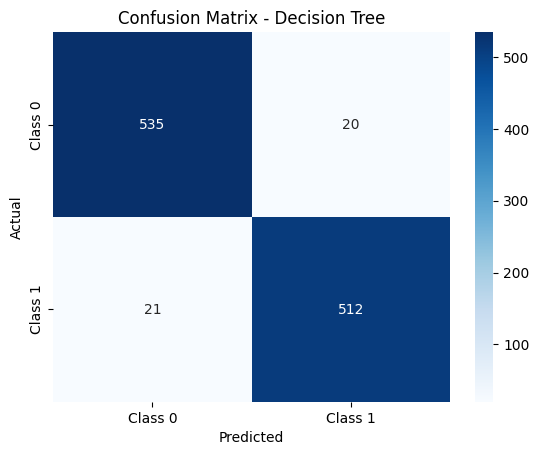

In [ ]:
# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Secara total, dari 1088 sampel dalam data pengujian, model berhasil membuat prediksi yang benar untuk 535 + 512 = 1047 sampel. Hanya 20 + 21 = 41 prediksi yang salah.

Dari confusion matrix ini, terlihat bahwa model Decision Tree memiliki performa yang sangat baik, dengan hanya sedikit kesalahan dalam memprediksi kedua kelas. Ini mencerminkan bahwa model dapat menangkap pola-pola dari data pengujian dengan tingkat akurasi yang tinggi, sebagaimana terlihat dalam hasil metrik lain seperti precision, recall, dan akurasi keseluruhan.

In [ ]:
# PCA for visualization
pca = PCA(n_components=2)
X_train_visualize = pca.fit_transform(X_train_scaled)  # Project training set into 2 dimensions
X_test_visualize = pca.transform(X_test_scaled)       # Project test set into 2 dimensions

In [ ]:
# Re-train the model for visualization
dt_best_model.fit(X_train_visualize, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5,
                       random_state=42)

In [ ]:
# Create a grid for visualization
x_min, x_max = X_train_visualize[:, 0].min() - 1, X_train_visualize[:, 0].max() + 1
y_min, y_max = X_train_visualize[:, 1].min() - 1, X_train_visualize[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

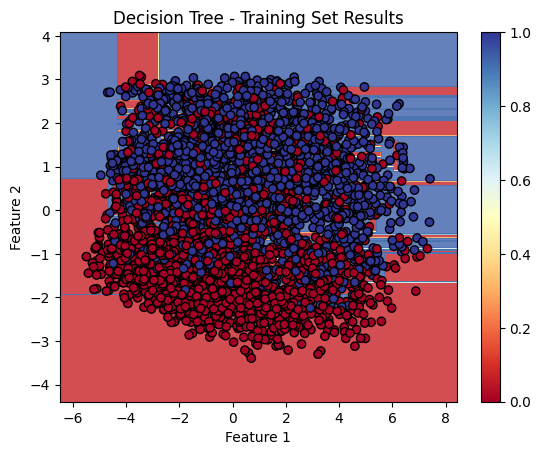

In [ ]:
# Plot decision boundaries for training set
Z = dt_best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_visualize[:, 0], X_train_visualize[:, 1], c=y_train, marker='o', edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title('Decision Tree - Training Set Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()


Gambar tersebut menunjukkan bagaimana model Decision Tree memisahkan dua kelas pada data training. Titik merah dan biru merepresentasikan sampel data dari dua kelas, sementara latar belakang berwarna menggambarkan area prediksi untuk setiap kelas. Mayoritas titik berada di area yang sesuai dengan kelasnya, menunjukkan bahwa model mampu mempelajari pola dengan baik pada data pelatihan

<ipython-input-401-2daf4b7232b3>:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_visualize[:, 0], X_test_visualize[:, 1], c=y_test, marker='x', edgecolor='k', cmap=plt.cm.RdYlBu)


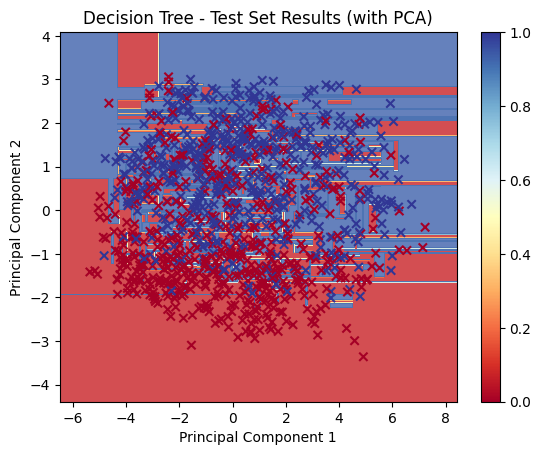

In [ ]:
# Visualize decision boundaries for the test set
Z_test = dt_best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

plt.contourf(xx, yy, Z_test, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_visualize[:, 0], X_test_visualize[:, 1], c=y_test, marker='x', edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title('Decision Tree - Test Set Results (with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

Gambar tersebut menunjukkan bagaimana model Decision Tree memisahkan dua kelas pada data test. Titik merah dan biru merepresentasikan sampel data dari dua kelas, sementara latar belakang berwarna menggambarkan area prediksi untuk setiap kelas. Mayoritas titik berada di area yang sesuai dengan kelasnya, menunjukkan bahwa model mampu mempelajari pola dengan baik pada data pelatihan

 **Exploratory Data Analysis (EDA) Decision Tree**

Pada Decision Tree kita melakukan Hyperparameter Tuning untuk menemukan kombinasi nilai terbaik dari hyperparameter dalam model machine learning yang dapat menghasilkan performa terbaik. Kita mendapatkan parameter terbaiknya yaitu {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'} yang mana penjelasannya sebagai berikut:

- Pertama, nilai criterion yang dipilih adalah 'entropy'. Ini berarti bahwa model menggunakan konsep entropi untuk mengevaluasi kualitas suatu pembagian (split) dalam pohon keputusan. Pendekatan ini fokus pada pengurangan ketidakpastian atau keragaman dalam data setiap kali sebuah split dilakukan.
- Selanjutnya, max_depth bernilai None, yang mengindikasikan bahwa tidak ada batasan kedalaman pada pohon keputusan. Artinya, pohon akan terus tumbuh hingga semua daun hanya berisi satu kelas atau hingga tidak ada lagi split yang dapat meningkatkan hasil.
- Kemudian, min_samples_leaf ditetapkan pada nilai 1. Ini menentukan jumlah minimal sampel yang harus ada pada setiap daun pohon, dan dalam kasus ini, daun dapat dibentuk bahkan dengan satu sampel saja. Hal ini memungkinkan pohon menangkap detail dari data secara granular.
- Parameter min_samples_split memiliki nilai 5, menunjukkan bahwa suatu node harus memiliki setidaknya 5 sampel untuk dapat dipecah lebih lanjut. Batasan ini membantu mencegah model menjadi terlalu kompleks atau overfit dengan membatasi pembagian pada node dengan sedikit data.
- Terakhir, parameter splitter bernilai 'best'. Ini berarti bahwa model memilih pembagian yang memberikan hasil terbaik berdasarkan kriteria yang dipilih (dalam hal ini, entropy), memastikan bahwa setiap pembagian meningkatkan kualitas pohon secara optimal.



Lalu kita mendapatkan nilai 99.77% untuk training accuracy dan 96.23% test accuracy, karena persentase cukup tinggi maka dilakukan pengecekan atau validasi memastikan model tidak overfitting. Validasi dilakukan dengan menggunakan cross-validation yang menghasilkan nilai sebagai berikut:


```
Cross-Validation Scores for Decision Tree: [0.96781609 0.97241379 0.97126437 0.95972382 0.96432681]
Average Cross-Validation Score for Decision Tree: 0.9671089771569911
```

Secara keseluruhan, hasil cross-validation yang sangat baik menunjukkan bahwa model bekerja dengan baik pada dataset ini dan kemungkinan tidak mengalami overfitting.

Lalu dilakukan lagi validasi menggunakan classification report yang menghasilkan nilai sebagai berikut:


```
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       555
           1       0.96      0.96      0.96       533

    accuracy                           0.96      1088
   macro avg       0.96      0.96      0.96      1088
weighted avg       0.96      0.96      0.96      1088

```
Hasil classification report menunjukkan bahwa model sangat baik, dengan nilai f1-score 0.96 (mendekati 1). Ini adalah indikasi bahwa model yang dilatih mampu mengklasifikasikan data dengan sangat baik.

Lalu kita mendapatkan nilai dari Confusion Matrik sebagai berikut:


```
[535  20]
[ 21 512]
```
Confusion matrix ini menunjukkan bahwa model memiliki performa yang baik. Dari total prediksi, model berhasil mengklasifikasikan 535 data Class 0 dan 512 data Class 1 dengan benar. Namun, terdapat beberapa kesalahan, yaitu 20 data Class 0 diprediksi sebagai Class 1 (false positive), dan 21 data Class 1 diprediksi sebagai Class 0 (false negative). Hasil ini sejalan dengan hasil classification report yang menunjukkan nilai precision, recall, dan f1-score.


Dan yang terakhir kita melakukan visualisasi untuk melihat pembagian daerah menggunakan Decision Tree yang dibantu dengan Principal Component Analysis (PCA). PCA berguna untuk reduksi dimensi, menghilangkan redundansi antar fitur, dan menyederhanakan data sambil tetap mempertahankan informasi penting. Hal ini memungkinkan model machine learning untuk bekerja lebih efisien, lebih cepat, dan lebih baik dalam menghindari overfitting. Untuk Training Set Result dan Test Set Result keduanya membagi daerah dengan baik, walaupun ada beberapa data yang berada di luar daerahnya, namun secara keseluruhan model dengan Decision Tree ini berjalan dengan cukup baik



# **XGBoost Hyperparameter Tuning**

In [ ]:
# Encode labels if necessary
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Create the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42, eval_metric='logloss')

In [ ]:
# Define the hyperparameter grid for tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.5]
}

In [ ]:
# Perform hyperparameter tuning using GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.5],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [ ]:
# Get the best parameters and the best model
xgb_best_params = xgb_grid_search.best_params_
xgb_best_model = xgb_grid_search.best_estimator_

print(f"Best Parameters for XGBoost: {xgb_best_params}")

Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


Dalam output ini, colsample_bytree diatur ke nilai 1.0, yang berarti bahwa seluruh fitur yang tersedia akan digunakan secara acak dalam setiap pohon keputusan yang dibangun, untuk menghindari overfitting. Nilai gamma sebesar 0.5 menunjukkan adanya penurunan kompleksitas model dengan memberikan batasan untuk membelah pohon keputusan berdasarkan perbedaan nilai yang cukup signifikan. learning_rate yang diatur ke 0.1 menandakan seberapa besar perubahan yang dilakukan oleh model setiap kali melakukan update pada bobot, dengan nilai ini cenderung memberikan pembelajaran yang lebih hati-hati dan stabil.

Selanjutnya, max_depth yang bernilai 7 menunjukkan kedalaman maksimal pohon keputusan yang digunakan dalam model. Kedalaman yang lebih besar memungkinkan model untuk mempelajari hubungan yang lebih rumit, tetapi juga berisiko menyebabkan overfitting jika terlalu dalam. n_estimators yang diatur pada 200 berarti model akan membangun 200 pohon keputusan dalam proses pelatihan, yang memberikan kekuatan untuk memodelkan data lebih baik.

Terakhir, subsample sebesar 0.8 menunjukkan bahwa hanya 80% dari data yang akan digunakan untuk membangun setiap pohon, yang membantu dalam mencegah overfitting dengan memberi variasi pada model yang dibangun. Secara keseluruhan, parameter-parameter ini menghasilkan model XGBoost yang dioptimalkan dengan baik berdasarkan grid search yang dilakukan.

In [ ]:
# Train the model with the best parameters
xgb_classifier = xgb_grid_search.best_estimator_

In [ ]:
# Evaluate the model
xgb_train_accuracy = xgb_classifier.score(X_train_scaled, y_train)
xgb_test_accuracy = xgb_classifier.score(X_test_scaled, y_test)

print(f"Training Accuracy (Tuned XGBoost): {xgb_train_accuracy * 100:.2f}%")
print(f"Test Accuracy (Tuned XGBoost): {xgb_test_accuracy * 100:.2f}%")

Training Accuracy (Tuned XGBoost): 99.98%
Test Accuracy (Tuned XGBoost): 98.35%


Output tersebut menunjukkan hasil evaluasi model XGBoost yang telah dituning, dengan membandingkan akurasi pada data pelatihan dan data uji. Akurasi pelatihan sebesar 99.98% menunjukkan bahwa model ini sangat baik dalam memprediksi data yang digunakan selama pelatihan, dengan hampir semua data berhasil diprediksi dengan benar. Namun, nilai akurasi yang sangat tinggi ini juga perlu diwaspadai, karena bisa mengindikasikan adanya overfitting, di mana model terlalu menyesuaikan diri dengan data pelatihan dan kurang mampu menggeneralisasi pada data baru.

Sementara itu, akurasi pada data uji sebesar 98.35% menunjukkan bahwa meskipun model sangat bagus dalam memprediksi data yang belum pernah dilihat sebelumnya, ada sedikit penurunan performa dibandingkan dengan data pelatihan. Penurunan akurasi ini wajar dan menunjukkan bahwa model berhasil menghindari overfitting secara signifikan, karena masih memberikan hasil yang sangat baik pada data uji, yang merupakan representasi dari data yang akan digunakan di dunia nyata.

In [ ]:
# Cross-validation with 5 folds
xgb_cv_scores = cross_val_score(xgb_classifier, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Scores for XGBoost: {xgb_cv_scores}")
print(f"Average Cross-Validation Score for XGBoost: {xgb_cv_scores.mean()}")

Cross-Validation Scores for XGBoost: [0.97931034 0.98390805 0.98275862 0.97928654 0.97928654]
Average Cross-Validation Score for XGBoost: 0.9809100167982752


Output tersebut menunjukkan hasil dari evaluasi model XGBoost menggunakan teknik cross-validation dengan 5 lipatan (folds) pada data pelatihan. Setiap skor dalam array hasil cross-validation mewakili akurasi model pada masing-masing lipatan data, yang dilakukan untuk memastikan bahwa model diuji secara lebih adil dengan berbagai subset data. Dalam hal ini, skor akurasi untuk masing-masing lipatan adalah 0.9793, 0.9839, 0.9828, 0.9793, dan 0.9793, yang semuanya menunjukkan kinerja model yang sangat baik dengan nilai akurasi hampir 98%.

Rata-rata skor cross-validation sebesar 0.9809 atau sekitar 98.09% mengindikasikan bahwa, secara keseluruhan, model XGBoost ini memiliki kinerja yang stabil dan sangat baik di berbagai subset data. Rata-rata yang tinggi ini menandakan bahwa model mampu menggeneralisasi dengan baik pada data yang berbeda-beda dan tidak cenderung overfit pada satu bagian data saja.

In [ ]:
# Predicting the results for the test set
xgb_y_pred = xgb_classifier.predict(X_test_scaled)

In [ ]:
# Print classification report
print("Classification Report for XGBoost:")
print(classification_report(y_test, xgb_y_pred))

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       555
           1       0.98      0.98      0.98       533

    accuracy                           0.98      1088
   macro avg       0.98      0.98      0.98      1088
weighted avg       0.98      0.98      0.98      1088



Output tersebut menunjukkan kinerja model XGBoost pada data uji, dengan akurasi keseluruhan 98%. Precision, recall, dan f1-score untuk kedua kelas (0 dan 1) semuanya mencapai 0.98, menunjukkan bahwa model sangat baik dalam memprediksi kedua kelas. Baik "macro avg" maupun "weighted avg" juga menunjukkan hasil yang seimbang dan tinggi, menandakan model memiliki performa yang konsisten dan akurat dalam mengklasifikasikan data.

In [ ]:
# Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_y_pred)

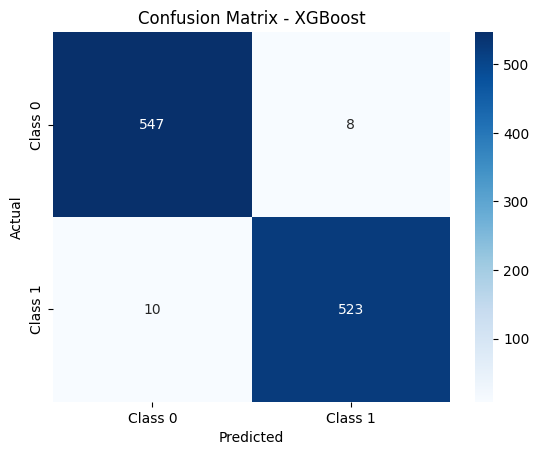

In [ ]:
# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Output tersebut menunjukkan matriks kebingunguan (confusion matrix) dari model XGBoost pada data uji. Matriks ini terdiri dari empat nilai yang menggambarkan performa model dalam mengklasifikasikan data ke dalam dua kelas. Nilai 547 pada posisi (0,0) menunjukkan jumlah prediksi yang benar untuk kelas 0, di mana model dengan benar mengklasifikasikan 547 data sebagai kelas 0. Nilai 523 pada posisi (1,1) menunjukkan jumlah prediksi yang benar untuk kelas 1, di mana model dengan benar mengklasifikasikan 523 data sebagai kelas 1.

Di sisi lain, nilai 8 pada posisi (0,1) menunjukkan jumlah data kelas 0 yang salah diklasifikasikan sebagai kelas 1, sementara nilai 10 pada posisi (1,0) menunjukkan jumlah data kelas 1 yang salah diklasifikasikan sebagai kelas 0. Secara keseluruhan, matriks ini menunjukkan bahwa model XGBoost berhasil mengklasifikasikan mayoritas data dengan benar, dengan hanya sedikit kesalahan pada kedua kelas.

In [ ]:
# PCA for visualization
pca = PCA(n_components=2)
X_train_visualize = pca.fit_transform(X_train_scaled)  # Project training set into 2 dimensions
X_test_visualize = pca.transform(X_test_scaled)       # Project test set into 2 dimensions

In [ ]:
# Re-train the model for visualization
xgb_best_model.fit(X_train_visualize, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Create a grid for visualization
x_min, x_max = X_train_visualize[:, 0].min() - 1, X_train_visualize[:, 0].max() + 1
y_min, y_max = X_train_visualize[:, 1].min() - 1, X_train_visualize[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

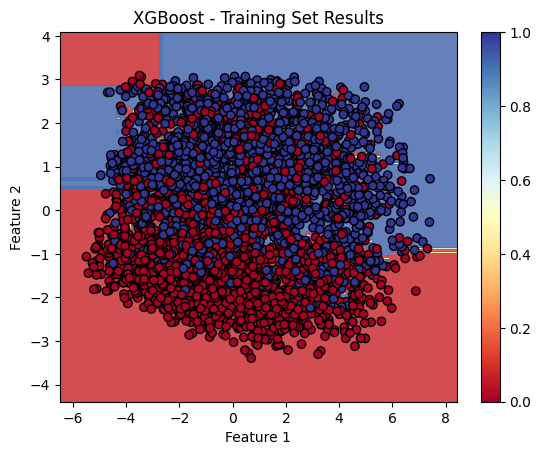

In [ ]:
# Plot decision boundaries for training set
Z = xgb_best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_visualize[:, 0], X_train_visualize[:, 1], c=y_train, marker='o', edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title('XGBoost - Training Set Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

Visualisasi ini menggambarkan hasil klasifikasi XGBoost pada data training, menggunakan dua fitur yang ditampilkan pada sumbu horizontal dan vertikal. Latar belakang berwarna menunjukkan wilayah prediksi model, dengan warna merah merepresentasikan prediksi untuk kelas 0 dan warna biru untuk kelas 1. Gradien pada warna tersebut mengindikasikan probabilitas prediksi, di mana warna yang lebih gelap menunjukkan tingkat keyakinan yang lebih tinggi dari model.

Data titik-titik di plot mewakili sampel dalam data training, dengan titik merah sebagai data dari kelas 0 dan titik biru dari kelas 1. Garis pemisah yang terlihat di antara area merah dan biru adalah batas keputusan yang ditentukan oleh XGBoost, di mana model membagi ruang fitur menjadi dua wilayah klasifikasi. Secara keseluruhan, model tampak mampu memisahkan kedua kelas dengan cukup baik, meskipun beberapa data terlihat berada di wilayah yang salah klasifikasi, yang menunjukkan adanya keterbatasan dalam menangkap distribusi data sepenuhnya.

<ipython-input-418-844f1a79ab10>:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_visualize[:, 0], X_test_visualize[:, 1], c=y_test, marker='x', edgecolor='k', cmap=plt.cm.RdYlBu)


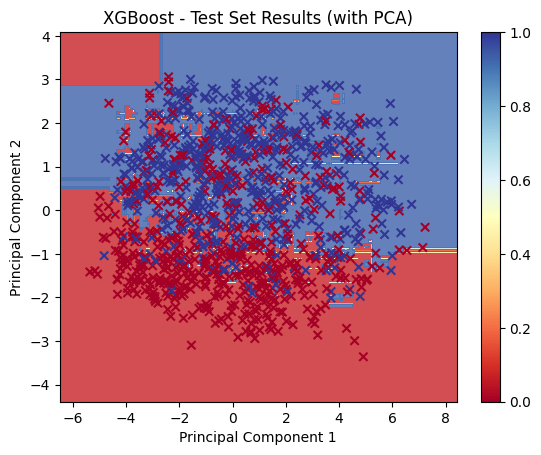

In [ ]:
# Visualize decision boundaries for the test set
Z_test = xgb_best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

plt.contourf(xx, yy, Z_test, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_visualize[:, 0], X_test_visualize[:, 1], c=y_test, marker='x', edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title('XGBoost - Test Set Results (with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

Gambar tersebut menunjukkan bagaimana model XGBoost memisahkan dua kelas pada data test. Titik merah dan biru merepresentasikan sampel data dari dua kelas, sementara latar belakang berwarna menggambarkan area prediksi untuk setiap kelas. Mayoritas titik berada di area yang sesuai dengan kelasnya, menunjukkan bahwa model mampu mempelajari pola dengan baik pada data pelatihan

 **Exploratory Data Analysis (EDA) XGBoost**

Pada XGBoost kita melakukan Hyperparameter Tuning untuk menemukan kombinasi nilai terbaik dari hyperparameter dalam model machine learning yang dapat menghasilkan performa terbaik. Kita mendapatkan parameter terbaiknya yaitu {'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8} yang mana penjelasannya sebagai berikut:

- Colsample_bytree diatur ke nilai 1.0, yang berarti bahwa seluruh fitur yang tersedia akan digunakan secara acak dalam setiap pohon keputusan yang dibangun, untuk menghindari overfitting.
- Nilai gamma sebesar 0.5 menunjukkan adanya penurunan kompleksitas model dengan memberikan batasan untuk membelah pohon keputusan berdasarkan perbedaan nilai yang cukup signifikan.
- Learning_rate yang diatur ke 0.1 menandakan seberapa besar perubahan yang dilakukan oleh model setiap kali melakukan update pada bobot, dengan nilai ini cenderung memberikan pembelajaran yang lebih hati-hati dan stabil.
- Max_depth yang bernilai 7 menunjukkan kedalaman maksimal pohon keputusan yang digunakan dalam model. Kedalaman yang lebih besar memungkinkan model untuk mempelajari hubungan yang lebih rumit, tetapi juga berisiko menyebabkan overfitting jika terlalu dalam.
- N_estimators yang diatur pada 200 berarti model akan membangun 200 pohon keputusan dalam proses pelatihan, yang memberikan kekuatan untuk memodelkan data lebih baik.
- Subsample sebesar 0.8 menunjukkan bahwa hanya 80% dari data yang akan digunakan untuk membangun setiap pohon, yang membantu dalam mencegah overfitting dengan memberi variasi pada model yang dibangun.



Lalu kita mendapatkan nilai 99.98% untuk training accuracy dan 98.35% test accuracy, karena persentase sangat tinggi maka dilakukan pengecekan atau validasi memastikan model tidak overfitting. Validasi dilakukan dengan menggunakan cross-validation yang menghasilkan nilai sebagai berikut:


```
Cross-Validation Scores for XGBoost: [0.97931034 0.98390805 0.98275862 0.97928654 0.97928654]
Average Cross-Validation Score for XGBoost: 0.9809100167982752
```

Secara keseluruhan, hasil cross-validation yang sangat baik menunjukkan bahwa model bekerja dengan baik pada dataset ini dan kemungkinan tidak mengalami overfitting.

Lalu dilakukan lagi validasi menggunakan classification report yang menghasilkan nilai sebagai berikut:


```
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       555
           1       0.98      0.98      0.98       533

    accuracy                           0.98      1088
   macro avg       0.98      0.98      0.98      1088
weighted avg       0.98      0.98      0.98      1088

```
Hasil classification report menunjukkan bahwa model sangat baik, dengan nilai f1-score 0.98 (mendekati 1). Ini adalah indikasi bahwa model yang dilatih mampu mengklasifikasikan data dengan sangat baik.

Lalu kita mendapatkan nilai dari Confusion Matrik sebagai berikut:


```
[547  8]
[ 10 523]
```
Confusion matrix ini menunjukkan bahwa model memiliki performa yang baik. Dari total prediksi, model berhasil mengklasifikasikan 547 data Class 0 dan 523 data Class 1 dengan benar. Namun, terdapat beberapa kesalahan, yaitu 8 data Class 0 diprediksi sebagai Class 1 (false positive), dan 10 data Class 1 diprediksi sebagai Class 0 (false negative). Hasil ini sejalan dengan hasil classification report yang menunjukkan nilai precision, recall, dan f1-score.


Dan yang terakhir kita melakukan visualisasi untuk melihat pembagian daerah menggunakan XGBoost yang dibantu dengan Principal Component Analysis (PCA). PCA berguna untuk reduksi dimensi, menghilangkan redundansi antar fitur, dan menyederhanakan data sambil tetap mempertahankan informasi penting. Hal ini memungkinkan model machine learning untuk bekerja lebih efisien, lebih cepat, dan lebih baik dalam menghindari overfitting. Untuk Training Set Result dan Test Set Result keduanya membagi daerah dengan baik, walaupun ada beberapa data yang berada di luar daerahnya, namun secara keseluruhan model dengan XGBoost ini berjalan dengan cukup baik



# **Kesimpulan**

Kita sudah membuat model dengan beberapa jenis algoritma seperti Logistic Regression, KNN, Decision Tree, dan XGBoost. Dan berikut hasil yang diperoleh dari beberapa algoritma tersebut:



---


**Logistic regression**

Training Accuracy: 93.17%

Test Accuracy: 94.03%

Cross-Validation Scores: [0.93103448 0.93908046 0.92413793 0.92289988 0.92750288]

Average Cross-Validation Score: 0.9289311270716769


```
          precision    recall  f1-score   support

       0       0.94      0.94      0.94       555
       1       0.94      0.94      0.94       533

accuracy                           0.94      1088
macro avg      0.94      0.94      0.94      1088
weighted avg   0.94      0.94      0.94      1088
```



```
Confusion Matrix
[523  32]
[ 33 500]
```



---


**KNN**

Training Accuracy (Tuned Model): 100.00%

Test Accuracy (Tuned Model): 92.28%

Cross-Validation Scores: [0.9183908  0.92183908 0.92413793 0.93210587 0.92750288]

Average Cross-Validation Score: 0.9247953123553299



```
          precision    recall  f1-score   support

       0       0.92      0.93      0.92       555
       1       0.92      0.92      0.92       533

accuracy                           0.92      1088
macro avg       0.92      0.92      0.92     1088
weighted avg       0.92      0.92      0.92  1088
```



```
Confusion Matrix
[514  41]
[ 43 490]
```


---

**Decision Tree**

Training Accuracy (Tuned Decision Tree): 99.77%

Test Accuracy (Tuned Decision Tree): 96.23%

Cross-Validation Scores for Decision Tree: [0.96781609 0.97241379 0.97126437 0.95972382 0.96432681]

Average Cross-Validation Score for Decision Tree: 0.9671089771569911




```
          precision    recall  f1-score   support

       0       0.96      0.96      0.96       555
       1       0.96      0.96      0.96       533

accuracy                           0.96      1088
macro avg      0.96      0.96      0.96      1088
weighted avg   0.96      0.96      0.96      1088
```



```
Confusion Matrix
[535  20]
[ 21 512]
```



---

**XGBoost**
Training Accuracy (Tuned XGBoost): 99.98%

Test Accuracy (Tuned XGBoost): 98.35%

Cross-Validation Scores for XGBoost: [0.97931034 0.98390805 0.98275862 0.97928654 0.97928654]

Average Cross-Validation Score for XGBoost: 0.9809100167982752



```
          precision    recall  f1-score   support

       0       0.98      0.99      0.98       555
       1       0.98      0.98      0.98       533

accuracy                           0.98      1088
macro avg      0.98      0.98      0.98      1088
weighted avg   0.98      0.98      0.98      1088
```



```
Confusion Matrix
[547   8]
[ 10 523]
```

---

**Kesimpulan**
Dari data diatas dapat kita simpulkan bahwa algoritma XGBoost merupakan algoritma terbaik yang dapat digunakan pada kasus ini dengan dataset AirQualityUCI.csv. Kita dapat melihat bahwa nilai Test Accuracynya merupakan yang tertinggi, sehingga ketika ada data baru model akan lebih baik dalam memprediksinya





